In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
import scipy.linalg
matplotlib.rcParams["xtick.labelsize"] = 20
matplotlib.rcParams["ytick.labelsize"] = 20
matplotlib.rcParams["image.cmap"] = "inferno"
matplotlib.rcParams["axes.titlesize"] = 25
matplotlib.rcParams["axes.labelsize"] = 25
from matplotlib import pyplot as plt
from typing import Optional

import transduction
import floquet_analysis
import pulse
import single_photon_scattering

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pickle

with open('data/params_for_floq_transm.pkl', 'rb') as f:
    params_data = pickle.load(f)[0]

In [5]:
params_data

{'freqs': array([-4.54542857, -4.54514286, -4.54485714, ...,  4.54457143,
         4.54485714,  4.54514286]),
 'num_emitters': 10,
 'gamma': 0.06283185307179587,
 'Gamma': 0.6283185307179586,
 'delta_mu': array([ -1.45646119,  26.77928841, -14.75749262,   3.32126389,
         -6.35214226,  -7.03763709,  -4.00143462,   5.33469627,
         -2.31813569, -22.05352798]),
 'delta_opt': array([  2.49051099, -11.21762125,   3.81649818, -10.02129355,
        -18.13885046, -14.91448099,   1.5873664 ,  15.44797279,
         19.25780915,  16.98021579]),
 'L': 200,
 'fund_freq': 0.031415926535897934,
 'coeffs': array([ 0.00000000e+00,  2.30029424e+00, -2.07333082e+00,  3.62420670e-01,
        -5.95885381e-01, -2.06003308e+00,  2.02714122e+00, -6.42541679e-01,
         5.30116159e-01,  1.59321990e+00, -7.68114156e-01,  3.31914635e-01,
        -1.19344556e-01, -2.28184818e-01, -6.74589874e-02,  5.93899882e-02,
        -1.78765774e-01, -1.93876933e-01,  2.19687596e-01, -2.31004714e-01,
         2.216

In [21]:
drive = transduction.TransductionPulse(
    params_data["L"], params_data["fund_freq"], params_data["coeffs"])
#drive = pulse.ConstantPulse(
#    0.5 * (params_data["num_emitters"] * params_data["gamma"] + params_data["Gamma"]))
period = 2 * np.pi / params_data["fund_freq"]
sys = transduction.TransductionSystem(
        params_data["delta_mu"],
        params_data["delta_opt"],
        params_data["gamma"],
        params_data["gamma"],
        params_data["Gamma"],
        params_data["Gamma"], drive)
obj = floquet_analysis.FloquetAnalyzer(sys, period, 220)
_, gfuncs = single_photon_scattering.compute_single_ph_gfunc(
    obj, 2 * np.pi * params_data["freqs"])
trans = np.sum(np.abs(gfuncs)**2, axis=1)

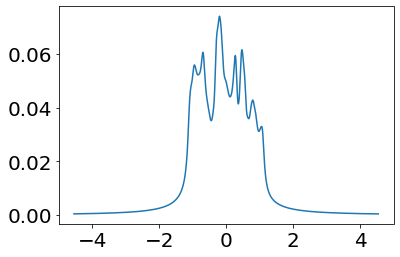

In [22]:
plt.plot(params_data["freqs"], np.sqrt(trans))

In [25]:
with open('data/params_for_floq_transm_2.pkl', 'rb') as f:
    trans_data = pickle.load(f)[1]

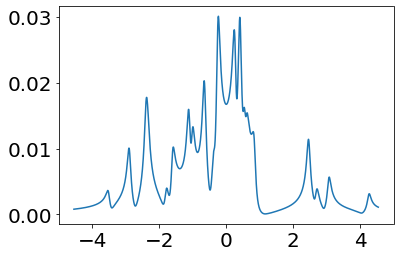

In [26]:
plt.plot(params_data["freqs"], trans_data)